# Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() ###create the linear regression object
regressor.fit(X_train, y_train)

## Predicting using the test data set

In [ ]:
y_pred = regressor.predict(X_test)

## Visualizing the training set results

In [ ]:
plt.scatter(X_train, y_train, color ='red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing the test set results

In [ ]:
plt.scatter(X_test, y_test, color ='red')
plt.plot(X_test,regressor.predict(X_test), color ='blue')
plt.title("Salary vs Experience (Test set)")
plt.xlable("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Multiple Linear Regression
## y=b0+b1x1+b2x2+...

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test）
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]

# Polynomial Regression
## y = b0+b1x1+b2x1^2+b3x1^3+...

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) ##matrix of the power features, in your prediction you also have to input this transformation matrix instead of x
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

## Visualising the Polynomial Regression results

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Support Vector Regression
## e insensitive tube (everything falls within the tube will be disregarded as error), only trying to min the OLS of the errors outside the tube

In [42]:
import numpy as np   
import matplotlib.pyplot as plt  
import pandas as pd   

In [43]:
dataset = pd.read_csv("Position_Salaries.csv")
X= dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [44]:
###X is a two dimensional array but y is a one dimensional vector so we have to reshape y to a two dimensional array
###The reason behind is that in the subsequent feature scaling, the fit_transformation would require a unique format in the input

In [45]:
Y = Y.reshape(len(Y),1) ###new shape of y number of rows and cols


## Feature scaling, since the Y is much higher than X so the feature would likely to be neglected by the SVR model

In [46]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() ###standardization = x-mean(x)/sd(x), this object is going to calculate the mean and var of the input, hence you should not use the same object and apply it to different inputs
sc_y = StandardScaler()
X = sc_x.fit_transform(X) 
Y = sc_y.fit_transform(Y) 


In [47]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [48]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset

In [49]:
from sklearn.svm import SVR 
regressor = SVR(kernel ='rbf') ##after you import the class, the next natural step is to create an instance of the class
regressor.fit(X,Y) ##train your regressor with the input

SVR()

# Predicting a new result

In [50]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) ##input value has to be a two Dimensional array, so you use [[]], and use the scaling object, the return is also a scaled y, which you have to reverse the scaling of y

array([170370.0204065])

# Visualizing the results

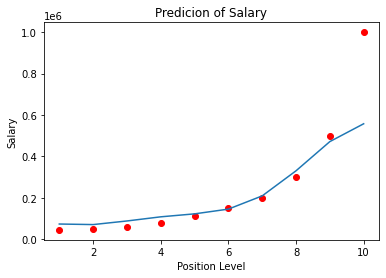

In [53]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y), color ="red")
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))
plt.title("Predicion of Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

# Decision Tree Regression
## Regression Trees only, not classification trees here, regression trees are trickier than classification trees

In [74]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values
y = y.reshape(len(y),1)

In [75]:
from sklearn.tree import DecisionTreeRegressor ##not classifier, since regressor would produce cts results instead of discrete 
regressor = DecisionTreeRegressor(random_state=0) ##fix the seed
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

## Predict using the model

In [76]:
regressor.predict([[6.5]])

array([150000.])

## Visualizing the Decisin Tree regression 

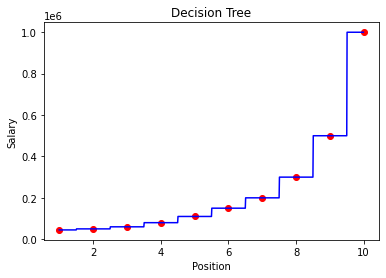

In [82]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid)),1)
plt.scatter(X,y,color="red")
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title("Decision Tree")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# Random Forest Ensemble Learning
## Regression only, not classification

In [91]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y=y.reshape(len(y),1)


In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X,y)
regressor.predict([[6.5]])

array([167000.])

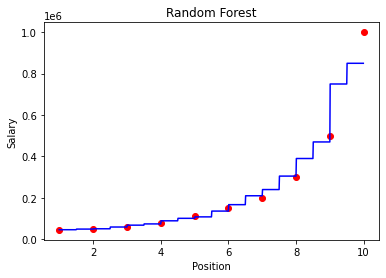

In [95]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid)),1)
plt.scatter(X,y,color ="red")
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title("Random Forest")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# Selecting the best regression model for your dataset

In [96]:
# R squared , 1-SSres/SStot
# Adjusted R squared, penalizing you for too many regressors

## Polynomial/Random Forest/Decision Tree/Support Vector Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('ENTER_THE_NAME_OF_YOUR_DATASET_HERE.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


### Feature Scaling (optional)

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))